<footer id="footer"></footer>

# <center> Принятие решений в бизнесе на основе данных </center>

<p align="center"><img src='https://i.ibb.co/Hz0VFzn/ab-testirovanie.png'></p>


Мы подготовили список гипотез для увеличения выручки интернет-магазина.   

Нам необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

<a href="#footer">К содержанию</a>
<footer id="footer"></footer>

---

## Загрузка библиотек и данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
from scipy import stats as st
import warnings
import math as mth

sns.set_style('darkgrid')
warnings.filterwarnings("ignore")
np.random.seed(42)

In [2]:
%%capture
!gdown --id 1LbSv9y0ONn6Va3lgbnjk9Z-GBwum78Xn
!unrar x -Y '/content/AB_proj.rar'

In [3]:
try:
    hypothesis = pd.read_csv('/content/hypothesis.csv')
    orders = pd.read_csv('/content/orders.csv')
    visitors = pd.read_csv('/content/visitors.csv')
except:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')
finally:
    print('Данные успешно загружены')

Данные успешно загружены


In [4]:
def get_info(data):
    display(data.head().style.set_caption('Общая информация по датасету'))
    display(data.describe().T)
    print('----')
    print('Информация о пропусках и типах данных')
    print('----')
    print()
    display(data.info())
    print('----')
    print()

<a href="#footer">К содержанию</a>
<footer id="footer"></footer>

---

##  Осмотр данных первичный

Посмотрим на сеты, что находятся у нас в работе: проверим пропуски и типы данных

### Гипотезы

Изучим сет `hypothesis`

In [5]:
get_info(hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


,count,mean,std,min,25%,50%,75%,max
Reach,9.0,4.777778,3.153481,1.0,3.0,3.0,8.0,10.0
Impact,9.0,4.777778,3.192874,1.0,3.0,3.0,7.0,10.0
Confidence,9.0,5.555556,3.045944,1.0,3.0,7.0,8.0,9.0
Efforts,9.0,4.888889,2.803767,1.0,3.0,5.0,6.0,10.0


----
Информация о пропусках и типах данных
----

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

----



Файл `hypothesis.csv` содержит следюущие признаки:  

`Hypothesis` — краткое описание гипотезы;  
`Reach` — охват пользователей по 10-балльной шкале;  
`Impact` — влияние на пользователей по 10-балльной шкале;  
`Confidence` — уверенность в гипотезе по 10-балльной шкале;  
`Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале.   

Пропусков нет, тип данных устраивает, менять не требуется

<a href="#footer">К содержанию</a>
<footer id="footer"></footer>

---

### Заказы


Изучим сет `orders`

In [6]:
get_info(orders)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,count,mean,std,min,25%,50%,75%,max
transactionId,1197.0,2.155621e+09,1.229085e+09,1062393.0,1.166776e+09,2.145194e+09,3.237740e+09,4.293856e+09
visitorId,1197.0,2.165960e+09,1.236014e+09,5114589.0,1.111826e+09,2.217985e+09,3.177606e+09,4.283872e+09
revenue,1197.0,8.348006e+03,3.919113e+04,50.0,1.220000e+03,2.978000e+03,8.290000e+03,1.294500e+06


----
Информация о пропусках и типах данных
----

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

----



`transactionId` — идентификатор заказа;  
`visitorId` — идентификатор пользователя, совершившего заказ;  
`date` — дата, когда был совершён заказ;  
`revenue` — выручка заказа;  
`group` — группа A/B-теста, в которую попал заказ.  

Пропусков нет, тип данных в признаке `date` необходимо для удоства перевести в datetime-формат

In [7]:
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')

<a href="#footer">К содержанию</a>
<footer id="footer"></footer>

---

### Посетители



Изучим сет `visitors`

In [8]:
get_info(visitors)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


,count,mean,std,min,25%,50%,75%,max
visitors,62.0,607.290323,114.40056,361.0,534.0,624.5,710.5,770.0


----
Информация о пропусках и типах данных
----

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

----



`date` — дата;  
`group` — группа `A/B`-теста;  
`visitors` — количество пользователей в указанную дату в указанной группе A/B-теста  


Пропусков нет, тип данных в признаке `date` необходимо для удоства перевести в datetime-формат

In [9]:
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')

<a href="#footer">К содержанию</a>
<footer id="footer"></footer>

---

## Приоритизация гипотез

 Чтобы максимизировать ожидаемое улучшение ключевых метрик бизнеса, сформулированные гипотезы приоритизируем.

### ICE

ICE:  

 
`Impact` — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;  
`Confidence` — насколько вы уверены, что это изменение повлияет на пользователей именно так;  
`Efforts` — сколько стоит протестировать эту гипотезу.  

---
    
 <font size="1"> Примечание:  
    Параметр `Impact` показывает, насколько сильно изменение повлияет на охваченных пользователей.  
    Параметр `Confidence` показывает уверенность в оценках других параметров.   
    Параметр `Efforts `показывает, насколько сложно проверить гипотезу. </font>



In [10]:
hypothesis.head()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


In [11]:
hypothesis = (hypothesis.assign(
                  ICE = lambda x: x['Impact'] * x['Confidence'] / x['Efforts']
                  )

)

In [12]:
(hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False).style.set_caption('ICE-score для гипотез')
.set_precision(2)
.background_gradient(low=0.42))

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Для удобства отобразим результаты на графике

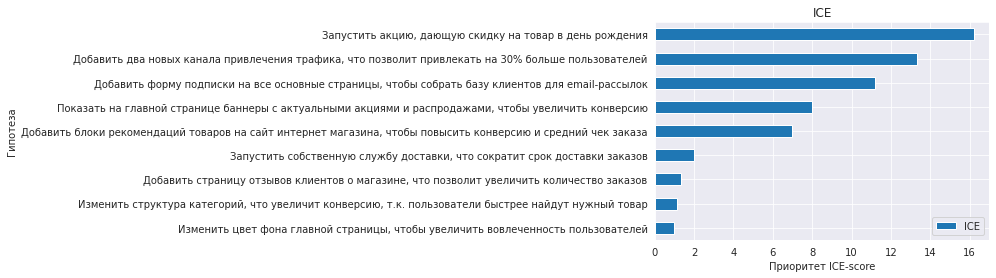

In [13]:
ax = (hypothesis[['Hypothesis', 'ICE']]
      .set_index('Hypothesis')
      .sort_values('ICE', ascending=True)
      .plot(kind='barh')
)
ax.set_xlabel('Приоритет ICE-score')
ax.set_ylabel('Гипотеза')
ax.set_title('ICE')
plt.show()

In [14]:
idx_ice = list(np.argpartition(hypothesis['ICE'], -3)[-3:])
print(f'Согласно ICE-score наиболее приоритетные гипотезы с индексами {idx_ice}')

Согласно ICE-score наиболее приоритетные гипотезы с индексами [7, 0, 8]


<a href="#footer">К содержанию</a>
<footer id="footer"></footer>

---

### RICE

Фреймворк RICE состоит из четырёх компонент:  
`Reach` — скольких пользователей затронет изменение, которое вы хотите внести;  
`Impact` — насколько сильно изменение повлияет на пользователей, их опыт и  удовлетворение от продукта;  
`Confidence` — насколько вы уверены, что это изменение повлияет на пользователей именно так;  
`Efforts` — сколько стоит протестировать эту гипотезу. 

In [15]:
hypothesis = (hypothesis.assign(
                  RICE = lambda x: x['Reach'] * x['Impact'] * x['Confidence'] / x['Efforts']
                  )

)

In [16]:
(hypothesis[['Hypothesis', 'RICE']].round(3).sort_values(by='RICE', ascending=False).style.set_caption('RICE-score для гипотез')
.set_precision(3)
.background_gradient(low=0.42))

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.000
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.000


Для удобства отобразим результаты на графике

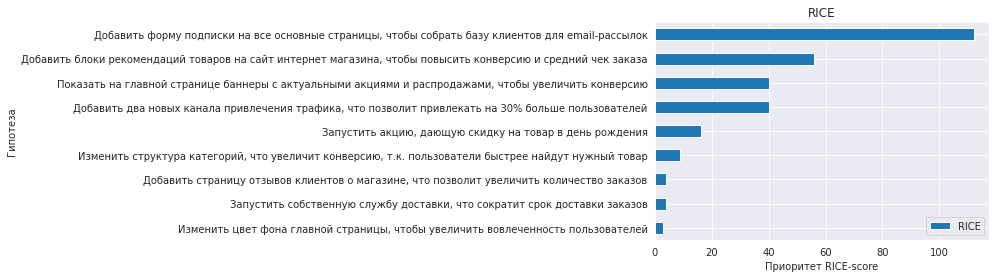

In [17]:
ax = (hypothesis[['Hypothesis', 'RICE']]
      .set_index('Hypothesis')
      .sort_values('RICE', ascending=True)
      .plot(kind='barh')
)
ax.set_xlabel('Приоритет RICE-score')
ax.set_ylabel('Гипотеза')
ax.set_title('RICE')
plt.show()

In [18]:
idx_rice = list(np.argpartition(hypothesis['RICE'], -3)[-3:])
print(f'Согласно RICE-score наиболее приоритетные гипотезы с индексами {idx_rice}')

Согласно RICE-score наиболее приоритетные гипотезы с индексами [0, 7, 2]


Выделим только те гипотезы, которые попали в топ 3 по `ICE-score` и `RICE-score`

In [19]:
idx = list(set(idx_rice).union(set(idx_ice)))

In [20]:
(hypothesis.iloc[idx]
 .sort_values(by='ICE', ascending=False)
 )

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200000,16.2
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333333,40.0
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200000,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000000,56.0


### Выводы

Мы видим, что согласно `RICE-score` лидирует 7ая гипотеза. Это связано с тем, что у нее самый высокий охват. Например, согласно `ICE-score` лидировала гипотеза 8, но при этом у нее охват - всего 1, следовательно, если проводить приоритизацию по `RICE` - данная гипотеза не изменит своего положения, в то время как гипотеза 7, по `ICE` - была на втором месте, но в следствие того, что ее Reach составляет 10 - она переместилась на первое место  


Согласно `ICE-score` наиболее приоритетные гипотезы с индексами 8, 0, 7  
Согласно `RICE-score` наиболее приоритетные гипотезы с индексами 7, 2, 0


<a href="#footer">К содержанию</a>
<footer id="footer"></footer>

---

## Анализ A/B-теста

Для удобства выведем таблицы `orders` и `visitors`

In [21]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [22]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Перед тем, как приступать к анализу проведенного `А/В`-теста, проверим, не попали ли одни и теже пользователи в разные группы - таких пользователей будем исключать, чтобы не искажать результаты теста

In [23]:
visitors_a_cnt = visitors.query('group == "A"')['visitors'].sum()
visitors_b_cnt = visitors.query('group == "B"')['visitors'].sum()
orders_a_cnt = orders.query('group == "A"').shape[0]
orders_b_cnt = orders.query('group == "B"').shape[0]


print(f'Визитов по группе А {visitors_a_cnt}')
print(f'Визитов по группе В {visitors_b_cnt}')
print(f'Заказов по группе А {orders_a_cnt}')
print(f'Заказов по группе В {orders_b_cnt}')

Визитов по группе А 18736
Визитов по группе В 18916
Заказов по группе А 557
Заказов по группе В 640


In [24]:
visitors_uniqe_A = orders[orders['group']=='A']['visitorId']
visitors_unique_B = orders[orders['group']=='B']['visitorId']
visitors_A_B = (orders
               .loc[orders['visitorId']
                    .isin(visitors_uniqe_A) & orders['visitorId']
                    .isin(visitors_unique_B),'visitorId'].unique()
                    )
print(f'Количество пользователей, попавших в обе группы: {len(visitors_A_B)}')

Количество пользователей, попавших в обе группы: 58


Необходимо убрать этих пользователей из дальнейшего анализа, чтобы не искажать результаты

In [25]:
orders = orders.loc[~orders['visitorId'].isin(visitors_A_B)]

In [26]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B


<a href="#footer">К содержанию</a>
<footer id="footer"></footer>

---

### График кумулятивной выручки по группам

Чтобы исключить проблему подсматривания, анализируем графики метрик  
Создадим массив уникальных пар значений дат и групп теста:

In [27]:
dates_groups = orders[['date', 'group']].drop_duplicates()

Соберём агрегированные кумулятивные по дням данные о заказах:

In [28]:
orders_aggregated = dates_groups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': pd.Series.nunique,
            'visitorId': pd.Series.nunique,
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

In [29]:
orders_aggregated.head()

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854


Аналогично получим агрегированные кумулятивные по дням данные о посетителях:

In [30]:
visitors_aggregated = dates_groups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

In [31]:
visitors_aggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


Объединим обе таблицы в одну и получим таблицу с куммулятивными значениями:

In [32]:
cumulative_data = orders_aggregated.merge(
    visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group']
)

In [33]:
cumulative_data.head()

,date,group,transactionId,visitorId,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


In [34]:
cumulative_data.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

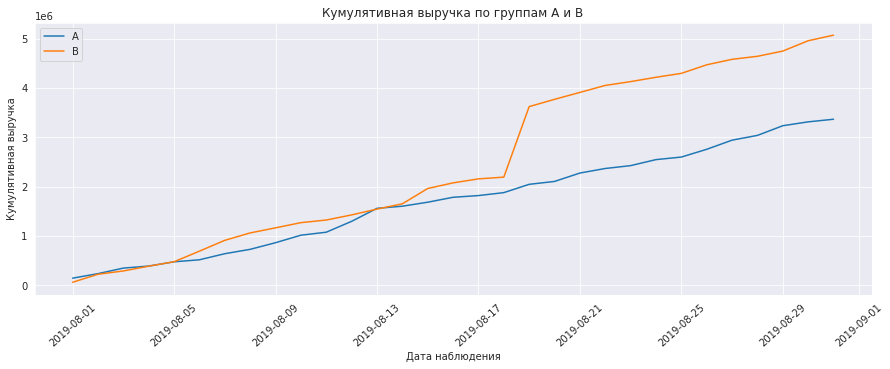

In [35]:
cumulative_revenue_A = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]
cumulative_revenue_B = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]
plt.figure(figsize=(15, 5))

plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue'], label='A')
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue'], label='B')


plt.xticks(rotation=42)
plt.title('Кумулятивная выручка по группам А и В')
plt.xlabel('Дата наблюдения')
plt.ylabel('Кумулятивная выручка')

plt.legend()
plt.show()

Выручка почти равномерно увеличивается в течение всего теста. 
Однако графики выручки группы В резко растет после `18.08.2019`. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке

<a href="#footer">К содержанию</a>
<footer id="footer"></footer>

---

### График кумулятивного среднего чека по группам

Построим график среднего чека по группам:  разделим кумулятивную выручку на кумулятивное число заказов. Таблицы уже подготовлены выше

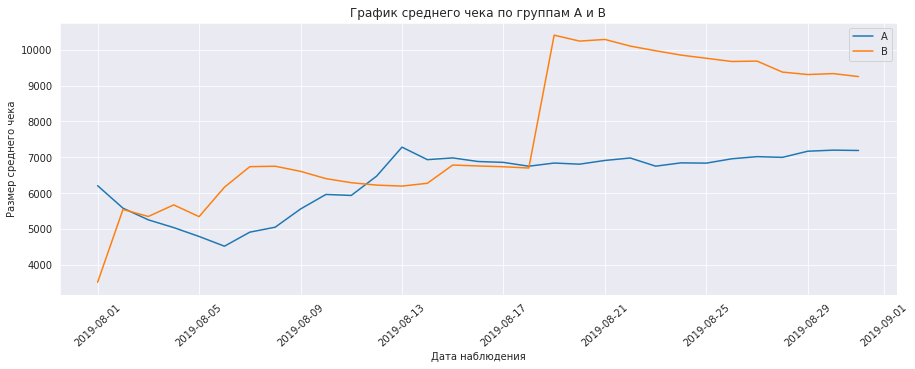

In [36]:
plt.figure(figsize=(15, 5))
plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue']/cumulative_revenue_A['orders'], label='A')
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue']/cumulative_revenue_B['orders'], label='B')
plt.xticks(rotation=42)
plt.title('График среднего чека по группам А и В')
plt.xlabel('Дата наблюдения')
plt.ylabel('Размер среднего чека')
plt.legend()
plt.show()

Аналогично наблюдаем резкий скачок у группы В - вероятнее всего у нас есть дорогая покупка - будем анализировать в дальнейшем. Принимать решение по данной метрике рано

<a href="#footer">К содержанию</a>
<footer id="footer"></footer>

---

### График относительного изменения кумулятивного среднего чека группы B к группе A

<a id='graf_check'></a>

Построим график относительного различия для среднего чека. Добавим горизонтальную ось методом `axhline()` 

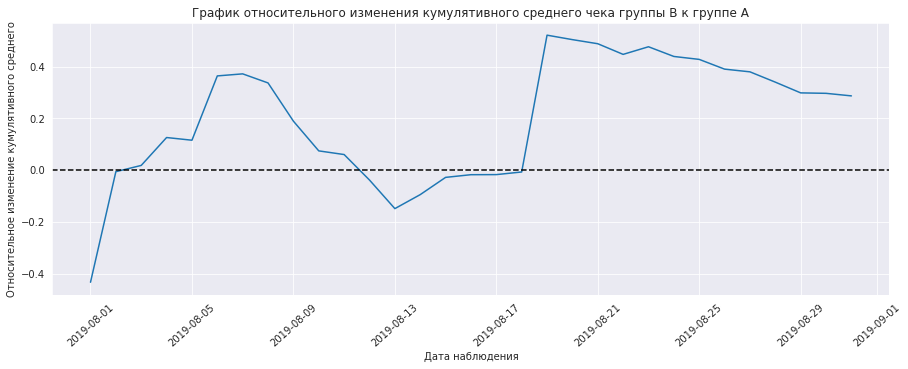

In [37]:
merged_cumulative_revenue = (cumulative_revenue_A
                           .merge(cumulative_revenue_B, 
                                  left_on='date'
                                  , right_on='date'
                                  , how='left'
                                  , suffixes=['A', 'B'])
                           )
rel_cumulative = ((merged_cumulative_revenue['revenueB']/merged_cumulative_revenue['ordersB'])
                  /(merged_cumulative_revenue['revenueA']/merged_cumulative_revenue['ordersA'])-1)

plt.figure(figsize=(15, 5))
plt.plot(merged_cumulative_revenue['date'], rel_cumulative)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Дата наблюдения')
plt.ylabel('Относительное изменение кумулятивного среднего')
plt.xticks(rotation=42)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.show()

В нескольких точках график различия между сегментами резко «скачет». Подтверждается наше предположения о выбросах и крупных заказах

<a href="#footer">К содержанию</a>
<footer id="footer"></footer>

---

### График кумулятивной конверсии по группам

Аналогично проанализируем график кумулятивной конверсии

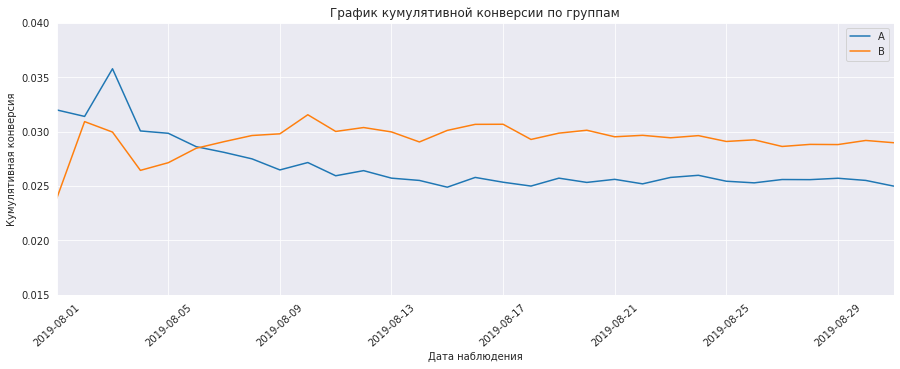

In [38]:
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']
cumulative_data_A = cumulative_data[cumulative_data['group']=='A']
cumulative_data_B = cumulative_data[cumulative_data['group']=='B']

plt.figure(figsize=(15, 5))
plt.plot(cumulative_data_A['date'], cumulative_data_A['conversion'], label='A')
plt.plot(cumulative_data_B['date'], cumulative_data_B['conversion'], label='B')
plt.legend()

min_ = cumulative_data_A['date'].min()
max_ = cumulative_data_A['date'].max()

plt.xlabel('Дата наблюдения')
plt.ylabel('Кумулятивная конверсия')

plt.axis([min_, max_, 0.015, 0.04])
plt.xticks(rotation=42)
plt.title('График кумулятивной конверсии по группам')
plt.show()

Получили симметричный график. Группы колебались около одного значения, но затем конверсия группы В вырвалась вперёд и зафиксировалась, а конверсия группы А просела и также зафиксировалась.

<a href="#footer">К содержанию</a>
<footer id="footer"></footer>

---

## График относительного изменения кумулятивной конверсии группы B к группе A

<a id='graf'></a>

Построим график относительного различия кумулятивных конверсий:

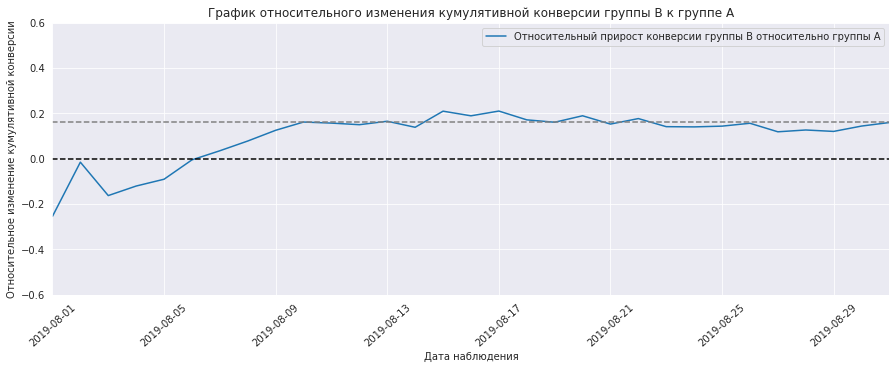

In [39]:
merged_cumulative_conversions = (cumulative_data_A[['date','conversion']]
                               .merge(cumulative_data_B[['date','conversion']]
                                      , left_on='date'
                                      , right_on='date'
                                      , how='left'
                                      , suffixes=['A', 'B'])
                               )

cumm_convesrion = merged_cumulative_conversions['conversionB']/merged_cumulative_conversions['conversionA']-1
plt.figure(figsize=(15, 5))
plt.plot(merged_cumulative_conversions['date'], 
         cumm_convesrion , 
         label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.16, color='grey', linestyle='--')
plt.axis([min_, max_, -0.6, 0.6])
plt.xticks(rotation=42)

plt.xlabel('Дата наблюдения')
plt.ylabel('Относительное изменение кумулятивной конверсии')

plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.show()

Группа В начала лидировать с начала теста и затем зафиксировалась около прироста примерно в 16% относительно группы А

В целом отношение конверсии ещё не установилось. Необходимо проанализивароть аномалии и выбросы

<a href="#footer">К содержанию</a>
<footer id="footer"></footer>

---

## Анализ выбросов и всплесков: крайние значения данных

### Точечный график количества заказов по пользователям. 95ый и 99ый перцентили

Подсчитаем количество заказов по пользователям и посмотрим на результат

In [40]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B


In [41]:
orders_by_users = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

orders_by_users.columns = ['userId', 'orders']

display(orders_by_users.sort_values(by='orders', ascending=False).head(10)) 

,userId,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


Построим гистрограмму распределения количества заказов на одного пользователя и точечную диаграмму числа заказов на одного пользователя:

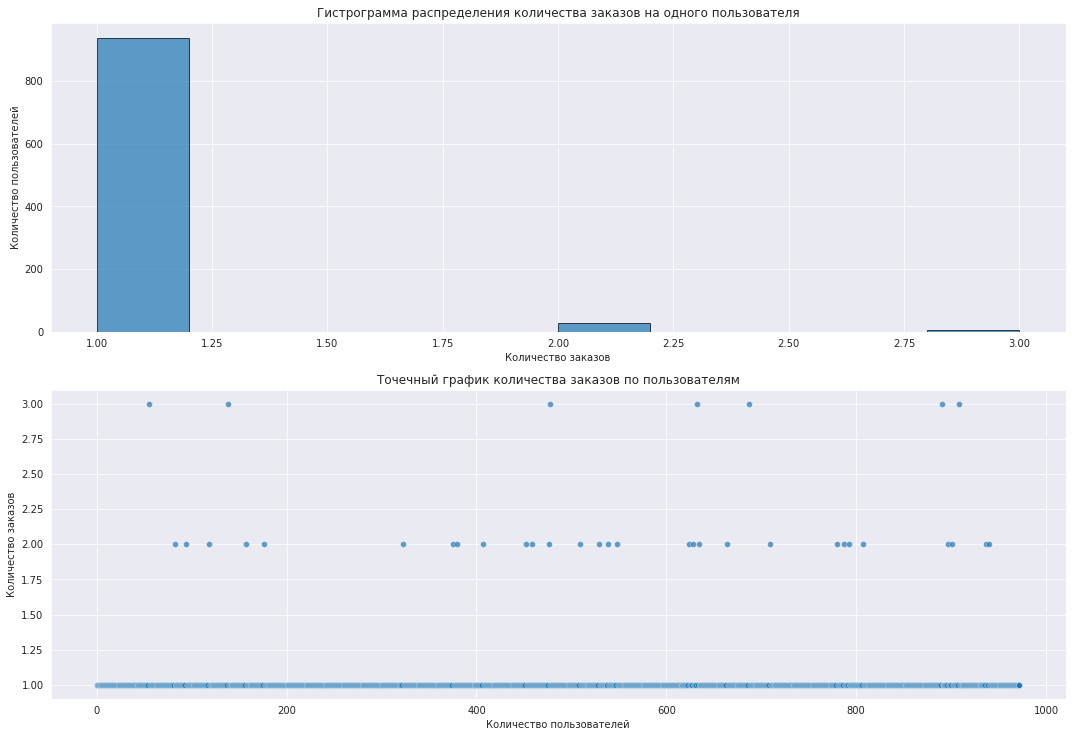

In [42]:
plt.figure(figsize=(15, 15))
plt.subplot(311)
plt.hist(orders_by_users['orders'], ec='black', alpha=.7) 
plt.title('Гистрограмма распределения количества заказов на одного пользователя')
plt.ylabel('Количество пользователей')
plt.xlabel('Количество заказов')

plt.subplot(312)
x_values = pd.Series(range(0,len(orders_by_users)))

sns.scatterplot(x=x_values, y='orders', 
                     data=orders_by_users, alpha=.7)
plt.title('Точечный график количества заказов по пользователям')
plt.ylabel('Количество заказов')
plt.xlabel('Количество пользователей')
plt.tight_layout()

В основном пользователи делают 1 заказ, есть те, кто делают сразу 2 или, редко, 3. Посчитаем выборочные перцентили количества заказов на одного пользователя:

In [43]:
perc_ord = np.percentile(orders_by_users['orders'], [95, 99])
print(perc_ord) 

[1. 2.]


In [44]:
print(f'Не более 5% офрормляли более чем {perc_ord[0]} заказ, не более 1% - заказывали более {perc_ord[1]} раз')

Не более 5% офрормляли более чем 1.0 заказ, не более 1% - заказывали более 2.0 раз



Разумно выбрать 1 или 2 заказа на одного пользователя за нижнюю границу числа заказов, и отсеять аномальных пользователей по ней. Удалим тех пользователей, что заказали 3 раза и более

<a href="#footer">К содержанию</a>
<footer id="footer"></footer>

---

### Точечный график стоимостей заказов. 95ый и 99ый перцентили

Изучим гистограмму распределения стоимостей заказов:

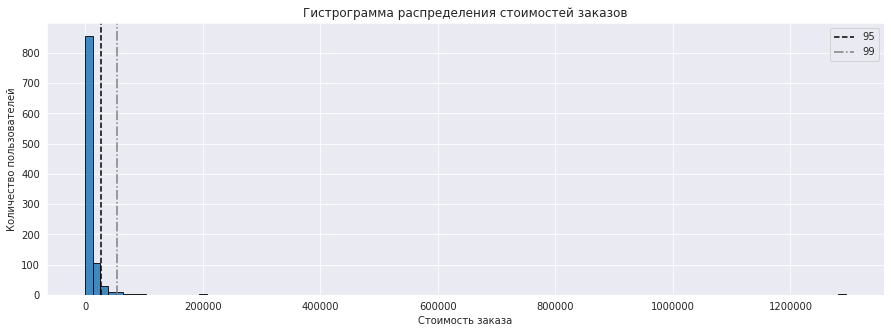

In [45]:
plt.figure(figsize=(15, 5))
plt.hist(orders['revenue'], bins=100, ec='black', alpha=.84) 
plt.title('Гистрограмма распределения стоимостей заказов')
plt.ticklabel_format(style='plain')
linestyle = ['--', '-.']
percentile = [95, 99]
color = ['black', 'grey']
for perc, line, col in zip(percentile, linestyle, color):
    plt.axvline(x=np.percentile(orders['revenue'], perc), 
              linestyle = line, 
              label=f'{perc}',
              color = col
              )
plt.xlabel('Стоимость заказа')
plt.ylabel('Количество пользователей')
plt.legend()
plt.show()

Мы наблюдаем выбросы по стоимости заказа. Посмотрим на точечном графике:

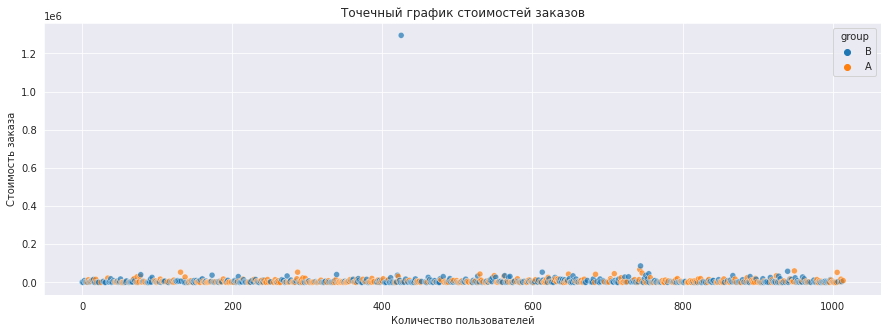

In [46]:
x_values = pd.Series(range(0,len(orders)))
plt.figure(figsize=(15, 5))
sns.scatterplot(x=x_values, y='revenue', hue='group',
                     data=orders, alpha=.7)
plt.xlabel('Количество пользователей')
plt.ylabel('Стоимость заказа')
plt.title('Точечный график стоимостей заказов')
plt.show()

Как видим - в группе В есть очень дорогой чек, который смещает нам метрики

In [47]:
perc = np.percentile(orders['revenue'], [95, 99])
print(perc) 

[26785. 53904.]


In [48]:
print(f'Не более 5% заказов дороже {perc[0]} рублей, не более 1% - дороже {perc[1]} рублей')

Не более 5% заказов дороже 26785.0 рублей, не более 1% - дороже 53904.0 рублей


Будем считать аномальными пользователями тех, что попали в 99 перцентиль и выше

<a href="#footer">К содержанию</a>
<footer id="footer"></footer>

---

## Статистическая значимость различий

Мы оценили результаты A/B-теста визуально и выяснили, что в данных, скорее всего, есть выбросы, также мы их обнаружили и нашли границы для их определения.

Для удобства составим сет данных, состоящий из:


- `orders_per_date_A` — количество заказов в выбранную дату в группе A;  
- `revenue_per_date_A` — суммарная выручка в выбранную дату в группе A;
- `orders_per_date_B` — количество заказов в выбранную дату в группе B;
- `revenue_per_date_A` — суммарная выручка в выбранную дату в группе B;
- `orders_cummulative_A` — суммарное число заказов до выбранной даты включительно в группе A;
- `revenue_cummulative_A` — суммарная выручка до выбранной даты включительно в группе A;
- `orders_cummulative_B` — суммарное количество заказов до выбранной даты включительно в группе B;
- `revenue_cummulative_B` — суммарная выручка до выбранной даты включительно в группе B;
- `visitors_per_date_A` — количество пользователей в выбранную дату в группе A;
- `visitors_per_date_B` — количество пользователей в выбранную дату в группе B;
- `visitors_cummulative_A` — количество пользователей до выбранной даты включительно в группе A;
- `visitors_cummulative_B` — количество пользователей до выбранной даты включительно в группе B.

In [49]:
visitors_per_date_A = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_per_date_A.columns = ['date', 'visitors_per_date_A']

visitors_cummulative_A = visitors_per_date_A.apply(
    lambda x: visitors_per_date_A[visitors_per_date_A['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_A': 'sum'}
    ),
    axis=1,
)
visitors_cummulative_A.columns = ['date', 'visitors_cummulative_A']

visitors_cummulative_A.head()

,date,visitors_cummulative_A
0,2019-08-01,719
1,2019-08-02,1338
2,2019-08-03,1845
3,2019-08-04,2562
4,2019-08-05,3318


In [50]:
visitors_per_date_B = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_per_date_B.columns = ['date', 'visitors_per_date_B']

visitors_cummulative_B = visitors_per_date_B.apply(
    lambda x: visitors_per_date_B[visitors_per_date_B['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_B': 'sum'}
    ),
    axis=1,
)
visitors_cummulative_B.columns = ['date', 'visitors_cummulative_B']

visitors_cummulative_B.head()

,date,visitors_cummulative_B
31,2019-08-01,713
32,2019-08-02,1294
33,2019-08-03,1803
34,2019-08-04,2573
35,2019-08-05,3280


In [51]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B


In [52]:
orders_per_date_A = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
orders_per_date_A.columns = ['date', 'orders_per_date_A', 'revenue_per_date_A']

orders_cummulative_A = orders_per_date_A.apply(
    lambda x: orders_per_date_A[orders_per_date_A['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_A': 'sum', 'revenue_per_date_A': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_cummulative_A.columns = [
    'date',
    'orders_cummulative_A',
    'revenue_cummulative_A',
]

orders_cummulative_A.head()

,date,orders_cummulative_A,revenue_cummulative_A
0,2019-08-01,23,142779
1,2019-08-02,42,234381
2,2019-08-03,66,346854
3,2019-08-04,77,388030
4,2019-08-05,99,474413


In [53]:
orders_per_date_B = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)

orders_per_date_B.columns = ['date', 'orders_per_date_B', 'revenue_per_date_B']

orders_cummulative_B = orders_per_date_B.apply(
    lambda x: orders_per_date_B[orders_per_date_B['date'] <= x['date']].agg(
        {'date': 'max', 'orders_per_date_B': 'sum', 'revenue_per_date_B': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_cummulative_B.columns = [
    'date',
    'orders_cummulative_B',
    'revenue_cummulative_B',
]

orders_cummulative_B.head()

,date,orders_cummulative_B,revenue_cummulative_B
0,2019-08-01,17,59758
1,2019-08-02,40,221801
2,2019-08-03,54,288850
3,2019-08-04,68,385740
4,2019-08-05,89,475648


In [54]:
df = (
    orders_per_date_A.merge(
        orders_per_date_B, left_on='date', right_on='date', how='left'
    )
    .merge(orders_cummulative_A, left_on='date', right_on='date', how='left')
    .merge(orders_cummulative_B, left_on='date', right_on='date', how='left')
    .merge(visitors_per_date_A, left_on='date', right_on='date', how='left')
    .merge(visitors_per_date_B, left_on='date', right_on='date', how='left')
    .merge(visitors_cummulative_A, left_on='date', right_on='date', how='left')
    .merge(visitors_cummulative_B, left_on='date', right_on='date', how='left')
)

df.head()

,date,orders_per_date_A,revenue_per_date_A,orders_per_date_B,revenue_per_date_B,orders_cummulative_A,revenue_cummulative_A,orders_cummulative_B,revenue_cummulative_B,visitors_per_date_A,visitors_per_date_B,visitors_cummulative_A,visitors_cummulative_B
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


Теперь можем непосредственно переходить к проверке статистических гипотез

<a href="#footer">К содержанию</a>
<footer id="footer"></footer>

---

### Сырые данные

Создадим заготовки для удобства анализа после испытаний:

In [55]:
p_val_list = []
result_list = []
rel_win_points = []
test_name = []

#### Конверсия

Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным — без удаления аномальных пользователей.

Создадим переменные `orders_by_users_A` и `orders_by_users_B` со столбцами `['visitorID', 'orders']`. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [56]:
orders_by_users_A = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
orders_by_users_A.columns = ['visitorId', 'orders']

orders_by_users_B = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
orders_by_users_B.columns = ['visitorId', 'orders'] 

Объявим переменные `sampleA` и `sampleB`, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули

In [57]:
sample_A = pd.concat(
    [
        orders_by_users_A['orders'],
        pd.Series(
            0,
            index=np.arange(
                df['visitors_per_date_A'].sum() - len(orders_by_users_A['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_B = pd.concat(
    [
        orders_by_users_B['orders'],
        pd.Series(
            0,
            index=np.arange(
                df['visitors_per_date_B'].sum() - len(orders_by_users_B['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)


Теперь мы можем провести тест Манна-Уитни, порог обозначим как 5%:

`H0 гипотеза`: статистически значимых различий в конверсии между группами нет  
`H1 гипотеза`: статистически значимые различия в конверсии между группами есть

In [58]:
alpha = .05
p_value = round(st.mannwhitneyu(sample_A, sample_B, alternative='two-sided')[1], 4)

if p_value < alpha:
    print(f'p-value {p_value} - Отвергаем Н0 гипотезу. Верна Н1 гипотеза')
    result_list.append('Отвергаем Н0 гипотезу. Верна Н1 гипотеза')
else:
    print(f'p-value {p_value} - Не удалось отвергнуть Н0 гипотезу')
    result_list.append('Не удалось отвергнуть Н0 гипотезу')

mean_val = round(sample_B.mean() / sample_A.mean() - 1, 3) * 100
print(f'Относительный выигрыш группы В - {mean_val} %')

p-value 0.011 - Отвергаем Н0 гипотезу. Верна Н1 гипотеза
Относительный выигрыш группы В - 16.0 %


In [59]:
p_val_list.append(p_value)
rel_win_points.append(mean_val)
test_name.append('Сырые данные, конверсия')

По «сырым» данным наблюдаем различия в конверсии групп A и B. Возможно это связано с выявленой аномалией - проведем проверку и по данным без аномалий

<a href="#footer">К содержанию</a>
<footer id="footer"></footer>

---

#### Средний чек

Посмотрим статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

`H0 гипотеза`: статистически значимых различий в среднем чеке между сегментами нет   
`H1 гипотеза`: статистически значимые различий в среднем чеке между сегментами есть 

In [60]:
alpha = .05

sample_A = orders[orders['group']=='A']['revenue']
sample_B = orders[orders['group']=='B']['revenue']
p_value = round(st.mannwhitneyu(sample_A, sample_B, alternative='two-sided')[1], 4)

if p_value < alpha:
    print(f'p-value {p_value} - Отвергаем Н0 гипотезу. Верна Н1 гипотеза')
    result_list.append('Отвергаем Н0 гипотезу. Верна Н1 гипотеза')
else:
    print(f'p-value {p_value} - Не удалось отвергнуть Н0 гипотезу')
    result_list.append('Не удалось отвергнуть Н0 гипотезу')

mean_val = round(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1, 3) * 100
print(f'Относительный выигрыш группы В - {mean_val} %')

p-value 0.8295 - Не удалось отвергнуть Н0 гипотезу
Относительный выигрыш группы В - 28.7 %


In [61]:
p_val_list.append(p_value)
rel_win_points.append(mean_val)
test_name.append('Сырые данные, средний чек')

По «сырым» данным также наблюдаем различия в среднем чеке групп A и B. При этом группа В существенно превосходит группу А. Выводы делать не будем, пока не проведем исследований на очищенных от аномалий данных

<a href="#footer">К содержанию</a>
<footer id="footer"></footer>

---

### Очищенные данные

In [62]:
print('Примем за аномальных пользователей тех, кто совершил больше'
      f', чем {perc_ord[1]} заказа или совершил заказ дороже {perc[1]} рублей')

Примем за аномальных пользователей тех, кто совершил больше, чем 2.0 заказа или совершил заказ дороже 53904.0 рублей


Узнаем, сколько всего аномальных пользователей

In [63]:
users_with_many_orders = pd.concat(
    [
        orders_by_users_A[orders_by_users_A['orders'] >= perc_ord[1]]['visitorId'],
        orders_by_users_B[orders_by_users_B['orders'] >= perc_ord[1]]['visitorId'],
    ],
    axis=0,
)
users_with_expensive_orders = orders[orders['revenue'] > perc[1]]['visitorId']
abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)

print(f'Количество аномальных пользователей: {abnormal_users.shape[0]} человек')

Количество аномальных пользователей: 45 человек


Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста

In [64]:
sample_A_filtered = pd.concat(
    [
        orders_by_users_A[
            np.logical_not(orders_by_users_A['visitorId'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                df['visitors_per_date_A'].sum() - len(orders_by_users_A['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_B_filtered = pd.concat(
    [
        orders_by_users_B[
            np.logical_not(orders_by_users_B['visitorId'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                df['visitors_per_date_B'].sum() - len(orders_by_users_B['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

Применим статистический критерий Манна-Уитни к полученным выборкам:

`H0 гипотеза`: статистически значимых различий в конверсии между группами нет  
`H1 гипотеза`: статистически значимые различия в конверсии между группами есть

In [65]:
alpha = .05
p_value = round(st.mannwhitneyu(sample_A_filtered, sample_B_filtered, alternative='two-sided')[1], 5)

if p_value < alpha:
    print(f'p-value {p_value} - Отвергаем Н0 гипотезу. Верна Н1 гипотеза')
    result_list.append('Отвергаем Н0 гипотезу. Верна Н1 гипотеза')
else:
    print(f'p-value {p_value} - Не удалось отвергнуть Н0 гипотезу')
    result_list.append('Не удалось отвергнуть Н0 гипотезу')

mean_val = round(sample_B_filtered.mean()/sample_A_filtered.mean()-1, 3) * 100
print(f'Относительный выигрыш группы В - {mean_val} %')

p-value 0.0082 - Отвергаем Н0 гипотезу. Верна Н1 гипотеза
Относительный выигрыш группы В - 18.8 %


In [66]:
p_val_list.append(p_value)
rel_win_points.append(mean_val)
test_name.append('Очищенные данные, конверсия')

Мы также отвергли нулевую гипотезу - при этом уменьшился относительный выигрыш группы В - ведь мы убрали аномалии

Посмотрим результаты по среднему чеку

In [67]:
pvalue = float(
    '{0:.3f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormal_users)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormal_users)),
                )
            ]['revenue'],
        alternative='two-sided')[1]
    )
)

if pvalue < alpha:
    print(f'p-value {pvalue} - Отвергаем Н0 гипотезу. Верна Н1 гипотеза')
    result_list.append('Отвергаем Н0 гипотезу. Верна Н1 гипотеза')
else:
    print(f'p-value {pvalue} - Не удалось отвергнуть Н0 гипотезу')
    result_list.append('Не удалось отвергнуть Н0 гипотезу')


mean_val = round(

        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormal_users)),
            )
        ]['revenue'].mean()
        - 1, 4
    ) * 100



print(f'Относительный выигрыш группы В {mean_val}')

p-value 0.969 - Не удалось отвергнуть Н0 гипотезу
Относительный выигрыш группы В 0.24


In [68]:
p_val_list.append(pvalue)
rel_win_points.append(mean_val)
test_name.append('Очищенные данные, средний чек')

<a href="#footer">К содержанию</a>
<footer id="footer"></footer>

---

Соберем наши результаты в таблицу для удобства анализа:

In [69]:
summary = pd.DataFrame({ 
    'Тест' : test_name , 
    'Относительный выигрыш, %' : rel_win_points ,
    'P значение' : p_val_list , 
    'Результат' : result_list}
    )


In [70]:
summary

,Тест,"Относительный выигрыш, %",P значение,Результат
0,"Сырые данные, конверсия",16.00,0.0110,Отвергаем Н0 гипотезу. Верна Н1 гипотеза
1,"Сырые данные, средний чек",28.70,0.8295,Не удалось отвергнуть Н0 гипотезу
2,"Очищенные данные, конверсия",18.80,0.0082,Отвергаем Н0 гипотезу. Верна Н1 гипотеза
3,"Очищенные данные, средний чек",0.24,0.9690,Не удалось отвергнуть Н0 гипотезу


Мы видим, что убрав выбросы, мы повлияли на относительный выигрыш одной группы над другой, изменили p-value, но при этом на результаты итоговые - это не повлияло. Группа `В` - лидирует в тесте

<a href="#footer">К содержанию</a>
<footer id="footer"></footer>

---

## Выводы

Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий.

Нет статистически значимого различие по величине среднего чека между группами как по сырым данным, так и после фильтрации аномалий.

[График](#graf) различия конверсии между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту.

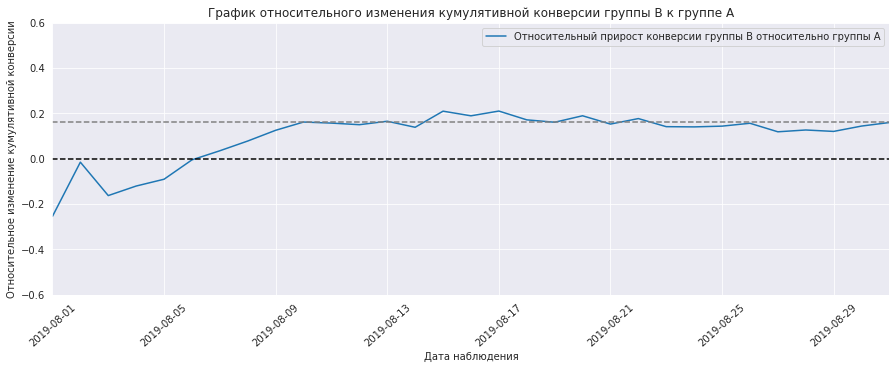

In [71]:
merged_cumulative_conversions = (cumulative_data_A[['date','conversion']]
                               .merge(cumulative_data_B[['date','conversion']]
                                      , left_on='date'
                                      , right_on='date'
                                      , how='left'
                                      , suffixes=['A', 'B'])
                               )

cumm_convesrion = merged_cumulative_conversions['conversionB']/merged_cumulative_conversions['conversionA']-1
plt.figure(figsize=(15, 5))
plt.plot(merged_cumulative_conversions['date'], 
         cumm_convesrion , 
         label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.16, color='grey', linestyle='--')
plt.axis([min_, max_, -0.6, 0.6])
plt.xticks(rotation=42)

plt.xlabel('Дата наблюдения')
plt.ylabel('Относительное изменение кумулятивной конверсии')

plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.show()

[График](#graf_check) различия среднего чека колеблется. Были найдены аномалии и мы их убрали в ходе исследования - статистическую значимость считали как на сырых данных, так и на данных очищенных

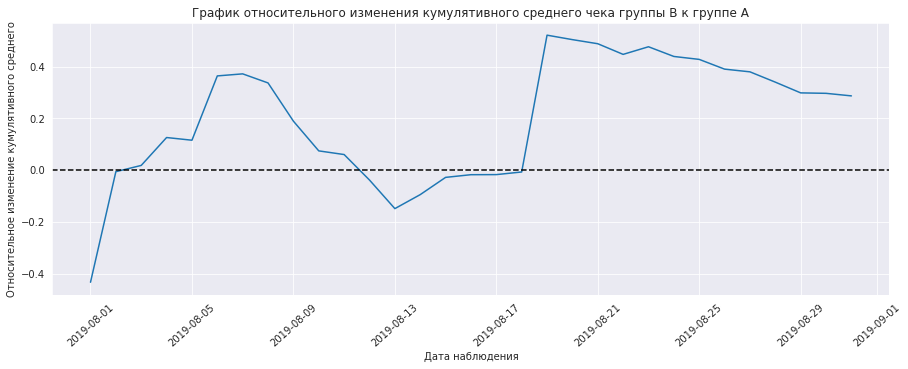

In [72]:
merged_cumulative_revenue = (cumulative_revenue_A
                           .merge(cumulative_revenue_B, 
                                  left_on='date'
                                  , right_on='date'
                                  , how='left'
                                  , suffixes=['A', 'B'])
                           )
rel_cumulative = ((merged_cumulative_revenue['revenueB']/merged_cumulative_revenue['ordersB'])
                  /(merged_cumulative_revenue['revenueA']/merged_cumulative_revenue['ordersA'])-1)

plt.figure(figsize=(15, 5))
plt.plot(merged_cumulative_revenue['date'], rel_cumulative)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Дата наблюдения')
plt.ylabel('Относительное изменение кумулятивного среднего')
plt.xticks(rotation=42)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.show()

Исходя из вышеназванных результатов, приходим к выводу, что тест можно остановить. Группа В лидирует перед группой А, статистическая значимость есть и доказана. Можем переходить к тестированию другой гипотезы.  


**ОБРАТИТЬ ВНИМАНИЕ**. Одни и теже пользователи попали в группы А и В - необходимо провести проверку сегментации трафика

<a href="#footer">К содержанию</a>
<footer id="footer"></footer>

---